# Práctica Guiada: Demostración de `GridSearchCV`

Vamos a usar el dataset iris... ya largamente conocido.

Veremos cómo usar `GridSearchCV` para tunear el hiperparámetro `k` del algoritmo de vecinos más cercanos.

**Nota de color:** (acá)[http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf] hay un link al paper de Ronald Fisher que usa este dataset en 1936.

In [1]:
import warnings 
warnings.simplefilter('ignore')
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = load_iris()
X = df.data
y = df.target

Separar el dataset en train y test, con un 20% de datos para testeo y random state =98

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=98)
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

## 1. Escribiendo los parámetros a "mano"

Está claro que, dependiendo del modelo, los hiperparámetros pueden tener un efecto importante en la calidad de la predicción. 
Veamos cómo varía el accuracy a la hora de predecir la especie de las flores para distintos valores de K.

In [4]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
k_scores

[0.9631868131868131,
 0.9626373626373625,
 0.9774725274725273,
 0.9774725274725273,
 0.9780219780219781,
 0.9780219780219781,
 0.9780219780219781,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9851648351648352,
 0.9760739260739261,
 0.9760739260739261,
 0.9760739260739261,
 0.9760739260739261,
 0.9669830169830169,
 0.968931068931069,
 0.9760739260739261,
 0.9683816183816184,
 0.9592907092907093,
 0.9592907092907093,
 0.9669830169830169,
 0.9683816183816184]

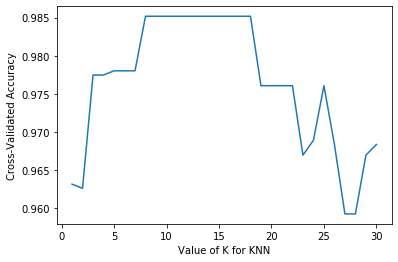

In [5]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

Como siempre, observamos que la performance cambia para distintos valores del hiperparámetro. <br />
¿Cómo podemos hacer para sistematizar esta búsqueda y sumar más hiperparámetros a la exploración? 

## 2. Usando `GridSearch`


In [6]:
from sklearn.model_selection import GridSearchCV

Se define una lista de parámetros a testear.

In [7]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier(n_neighbors=8)

In [8]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


Instanciamos el método `GridSearchCV`

In [9]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Hacemos el fit

In [10]:
grid.fit(X_train, y_train)

C:\Users\user\Anaconda3\envs\DataScienceAC\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=8, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

`GridSeachCV` devuelve un dict con mucha información. Desde el tiempo de fiteo de cada parámetro hasta los scores promedio (vía validación cruzada). También provee los score en cada train y test set de la K-Fold Cross Validation. 

In [11]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [12]:
pd.DataFrame(grid.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [13]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000693,0.000595,0.001803,0.000851,1,{'n_neighbors': 1},0.857143,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.958333,0.050221,27
1,0.000200,0.000400,0.001589,0.003465,2,{'n_neighbors': 2},0.928571,0.928571,0.846154,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.958333,0.051570,27
2,0.000000,0.000000,0.001077,0.001937,3,{'n_neighbors': 3},1.000000,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.035388,12
3,0.000104,0.000312,0.001548,0.004644,4,{'n_neighbors': 4},1.000000,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.035388,12
4,0.000104,0.000312,0.003340,0.006206,5,{'n_neighbors': 5},0.928571,0.928571,0.923077,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.034735,12
5,0.001356,0.004067,0.001886,0.004676,6,{'n_neighbors': 6},0.928571,0.928571,0.923077,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.034735,12
6,0.001351,0.004053,0.001666,0.004661,7,{'n_neighbors': 7},0.928571,0.928571,0.923077,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.034735,12
7,0.000100,0.000300,0.001674,0.004684,8,{'n_neighbors': 8},1.000000,0.928571,0.923077,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.983333,0.030959,1
8,0.001576,0.004728,0.001562,0.004686,9,{'n_neighbors': 9},1.000000,0.928571,0.923077,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.983333,0.030959,1
9,0.000000,0.000000,0.003124,0.006248,10,{'n_neighbors': 10},1.000000,0.928571,0.923077,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.983333,0.030959,1


Veamos el mejor modelo:

In [14]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                      weights='uniform'),
 0.9833333333333333,
 {'n_neighbors': 8})

### 2.1 Agregando otros parámetros para tunear

Vamos a agregar el parámetro binario de Peso del algoritmo knn que determina si algunos vecinos tendrán mayor ponderación que otros a la hora de clasificar. El valor distance indica que el peso es inversamente proporcional a la distancia

GridSearchCV exige que la grilla de parámetros a explorar venga en un diccionario con los nombres de los parámetros y la lista de los posibles valores. 

Noten que GridSearchCV tiene todos los métodos que la API de sklearn ofrece para modelos predictivos: fit, predict, predict_proba, etc.

In [15]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

Entonces, ahora el tunning se realizará iterando y alternando `weights` y `k` (nro. de vecinos cercanos).

In [16]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


**Check:** 
    1. ¿Cómo se realizará el proceso de búsqueda? 
    2. ¿Cuántas veces tendrá que iterar el algoritmo?

Ajustamos los modelos

In [17]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\user\Anaconda3\envs\DataScienceAC\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=8, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [18]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000670,0.000566,0.001610,0.000711,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.857143,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.958333,0.050221,55
1,0.000203,0.000406,0.000223,0.000450,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.857143,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.958333,0.050221,55
2,0.001439,0.003661,0.000509,0.000822,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.928571,0.928571,0.846154,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.958333,0.051570,55
3,0.000204,0.000408,0.001449,0.004024,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.857143,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.958333,0.050221,55
4,0.000000,0.000000,0.001648,0.004607,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",1.000000,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.035388,34
5,0.000100,0.000300,0.001668,0.005004,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",1.000000,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.035388,34
6,0.001562,0.004687,0.001569,0.004371,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",1.000000,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.035388,34
7,0.000100,0.000299,0.001527,0.004244,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.928571,0.928571,0.923077,0.923077,1.0,1.0,1.0,1.000000,1.000000,1.0,0.966667,0.036897,49
8,0.000000,0.000000,0.000303,0.000650,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.928571,0.928571,0.923077,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.034735,34
9,0.000105,0.000315,0.001569,0.004707,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.928571,0.928571,0.923077,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,0.975000,0.034735,34


Escogemos el mejor modelo

In [19]:
print (grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
0.9833333333333333
{'n_neighbors': 8, 'weights': 'uniform'}


## Diferencia de performance entre Random Search y Gridsearch

Dado el siguiente conjunto de parámetros:

        param_dist = {
                    "n_neighbors": list(range(1, 31)),
                    "weights": ['uniform', 'distance'],
                                        }

Implementar una búsqueda del conjunto óptimo de hiperparámetros tanto con GridSearchCV como con RandomSearchCV.
Verificar la diferencia en cada caso de:
    
    1. El tiempo de ejecución (utilizando la magic function %%time)
    2. La combinación óptima de parámetros
    3. La performance del mejor modelo en cada caso sobre los datos del test set que separamos anteriormente en términos de accuracy


In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
def busquedaRandomSearch(params_,iter_):
    gs = RandomizedSearchCV(estimator=knn, param_distributions=params_, scoring='accuracy', cv=10)
    fit = gs.fit(X_train, y_train)
    return gs   

In [22]:
def busquedaGridsearch(params_):
    gs = GridSearchCV(estimator=knn, param_grid=params_, scoring='accuracy', cv=10)
    fit = gs.fit(X_train, y_train)
    return gs    

In [23]:
%%time
gs_random_search = busquedaRandomSearch(****,10)      

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
%%time
gs_grid_search = busquedaGridsearch(****) 

In [ ]:
gs_random_search.best_params_

In [ ]:
gs_grid_search.best_params_

In [ ]:
from sklearn.metrics import accuracy_score

def obtener_performance(estimator):
    y_pred = estimator.predict(X_test)
    return accuracy_score(y_pred,y_test, normalize = True)

In [ ]:
obtener_performance(gs_grid_search.best_estimator_)

In [ ]:
obtener_performance(gs_random_search.best_estimator_)

**¿Qué conclusiones pueden sacar al respecto?**


## 3. Usamos los mejores parametros de Grid Search para correr las predicciones

In [ ]:
# generar el modelo según los resultados de Grid Search, fitear y calcular el valor predicho

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Calcular la matriz de confusión y las metricas de evaluación

Podemos usar el atajo que tiene `GridSeachCV`: usando el método `predict` sobre objeto `grid`. 

In [ ]:
grid.predict(X_test)

In [ ]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X,y))

# Curva Roc. 
Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

    Tasa de verdaderos positivos
    Tasa de falsos positivos

Ahora vamos a cálcular la curva ROC. Pero para esto tenemos que binarizar el problema de clasificación

Detalle sus conclusiones finales sobre la performance del modelo

In [ ]:
## ROC CURVE AND AUC
import numpy as np
from sklearn.metrics import roc_curve
# change iris to a binary classification problem
# setosa=0, versicolor=0, virginica=1
y_binary = np.where(y==2, 1, 0)
y_train_binary = np.where(y_train==2, 1, 0)
y_test_binary = np.where(y_test==2, 1, 0)

# make the problem harder by changing every 5th element to a 1
y_train_binary = [1 if index % 5 == 0 else response for index, response in enumerate(y_train_binary)]
y_test_binary = [1 if index % 5 == 0 else response for index, response in enumerate(y_test_binary)]

# use KNN for binary classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_binary)

# get predictions
y_preds_binary = knn.predict(X_test)
print (confusion_matrix(y_test_binary, y_preds_binary))

# get predicted probabilities
y_probs_binary = knn.predict_proba(X_test)[:, 1]
print (roc_auc_score(y_test_binary, y_probs_binary))

# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs_binary)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# redo CV using AUC as the scoring metric
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y_binary, cv=5, scoring='roc_auc')
scores
np.mean(scores)